In [1]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the CARDIOVASCULAR RISK DATA from the drive
risk_df = pd.read_csv("C:/Users/hi/Desktop/cardiovascular-risk-prediction-main/data_cardiovascular_risk.csv",index_col='id')

In [3]:
risk_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
risk_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [5]:
risk_df.shape

(3390, 16)

In [6]:
print(f'number of rows : {risk_df.shape[0]}  \nnumber of columns : {risk_df.shape[1]}')

number of rows : 3390  
number of columns : 16


In [7]:
# Dataset Info
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [8]:
# Checking Duplicate Values
value = len(risk_df[risk_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [9]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [10]:
# Missing Values Percentage
round(risk_df.isna().sum()/len(risk_df)*100, 2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

<AxesSubplot:>

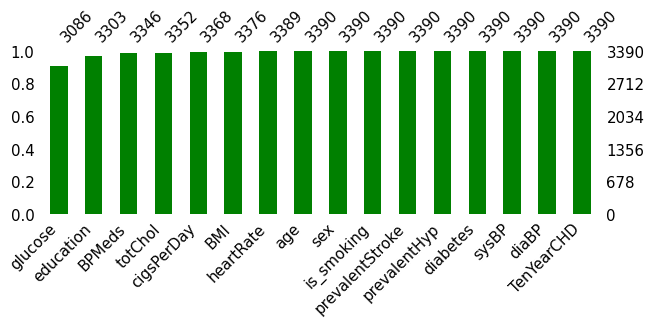

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(risk_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<AxesSubplot:ylabel='id'>

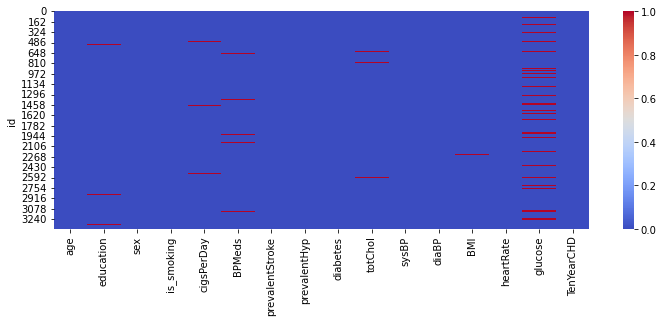

In [12]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(risk_df.isna(), cmap = 'coolwarm')

In [13]:
# Dataset Columns
risk_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# Dataset Describe    (used to get statistics of numerical columns)
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


In [15]:
# Check Unique Values for each variable.
for i in risk_df.columns.tolist():
  print("No. of unique values in",i,"is",risk_df[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


In [16]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in risk_df.columns:  
  if risk_df[col].nunique() > 10:
    numeric_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


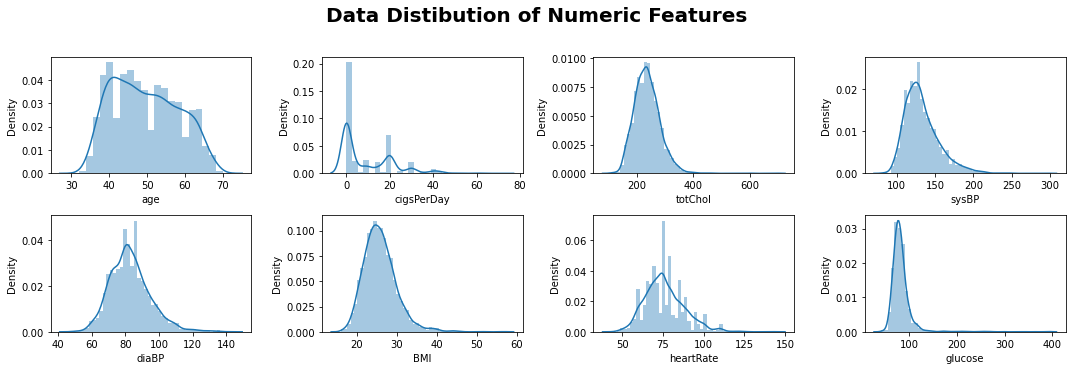

In [17]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data Distibution of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns

  # dist plots
  sns.distplot(risk_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

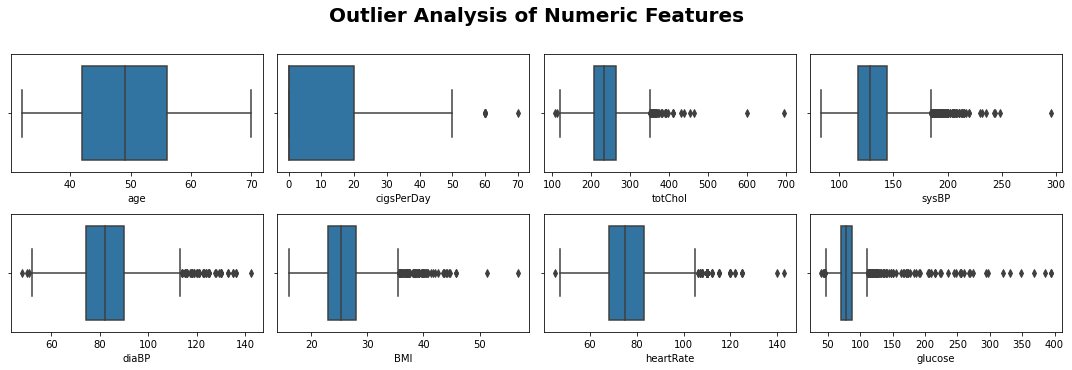

In [18]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns
  
  # boxplots
  sns.boxplot(risk_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

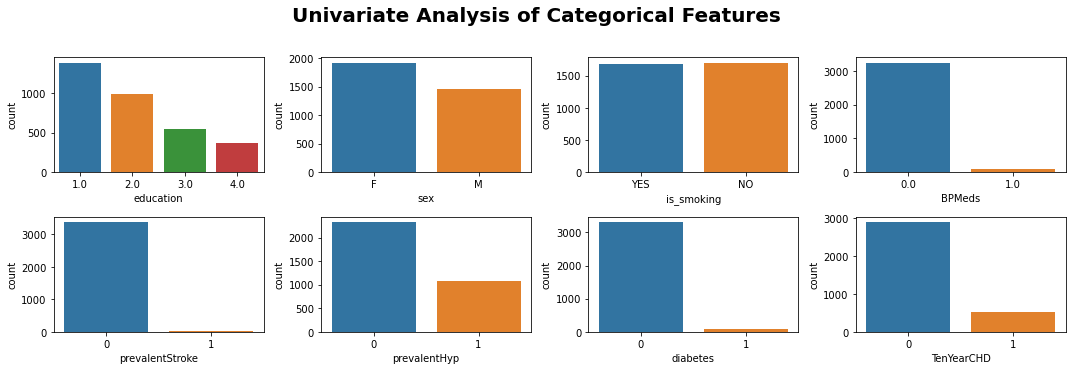

In [19]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features):
  plt.subplot(2, 4, i+1)            # subplot of 2 rows and 4 columns

  # countplot
  sns.countplot(risk_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

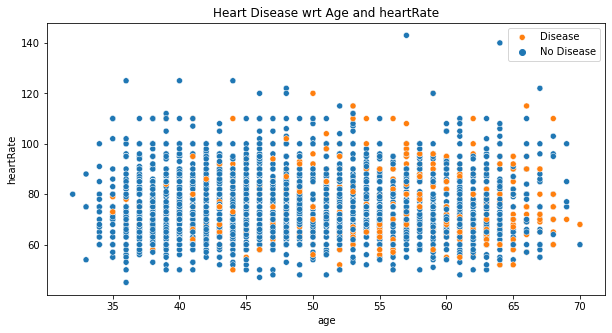

In [20]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease

# figsize
plt.figure(figsize=(10,5))
# scatterplot
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=risk_df)
# title
plt.title('Heart Disease wrt Age and heartRate')
plt.legend(['Disease', 'No Disease'])

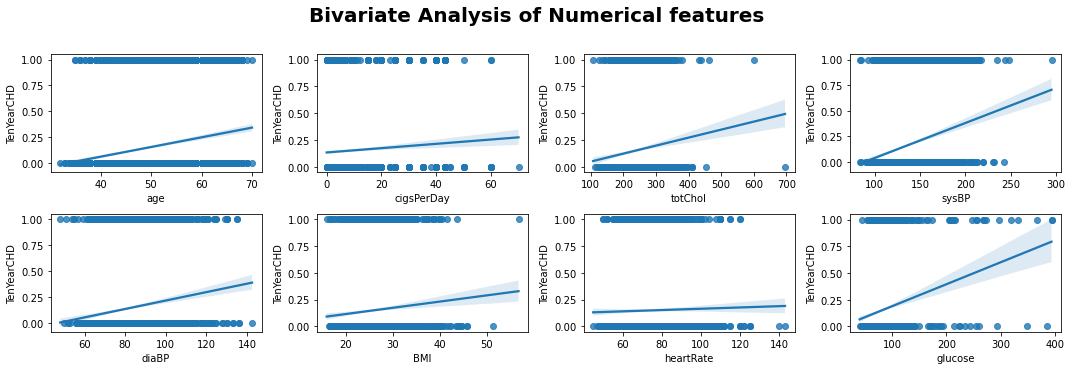

In [21]:
# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=risk_df[col], y='TenYearCHD', data=risk_df)
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

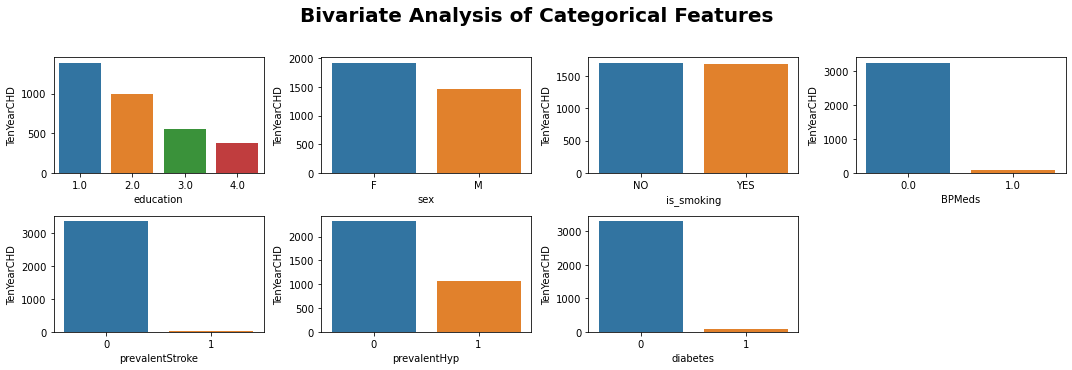

In [22]:
# Counting number of category present in each feature with respect to target feature  

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features[:-1]):       # taking all features in categoric column except target feature(TenYearCHD) 
  plt.subplot(2, 4, i+1)                                 # subplots of 2 rows and 4 columns
  a = risk_df.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

In [23]:
# counting duplicate values
risk_df.duplicated().sum()

0

In [24]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


<AxesSubplot:>

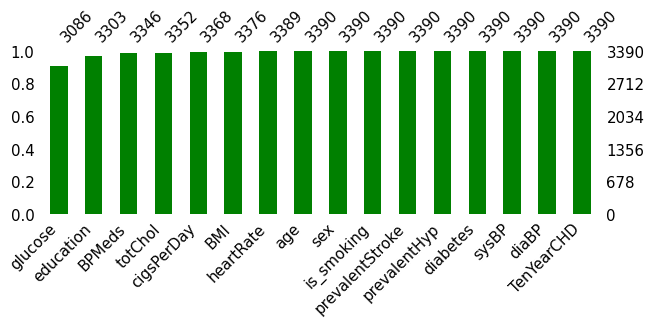

In [25]:
# Visualizing the missing values
import missingno as msno
msno.bar(risk_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [26]:
# Missing Values Percentage
round(risk_df.isna().sum()/len(risk_df)*100, 2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [27]:
# checking the shape of the data before missing value treatment
risk_df.shape

(3390, 16)

In [28]:
# features which has less than 5%  null values present. 
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
risk_df.dropna(subset=nan_columns, inplace=True)

In [29]:
# glucose level are continuous in nature. 
# Outlier are not treating yet thats why imputimg NaN values with median value.

risk_df['glucose'] = risk_df.glucose.fillna(risk_df.glucose.median())

In [30]:
# checking for null values after treating them.
risk_df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [31]:
# checking the shape of the data after missing values treatment
risk_df.shape

(3189, 16)

In [32]:
# statistical summary
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5


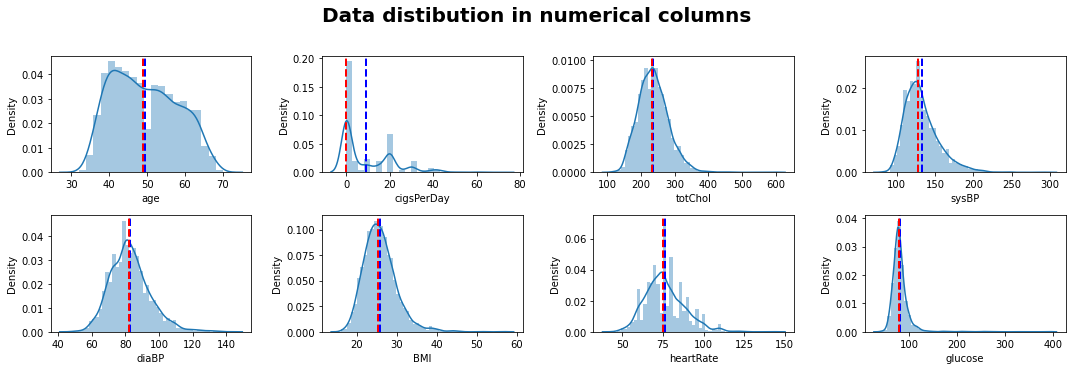

In [33]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                      # subplots of 2 rows and 4 columns

  # distplot
  sns.distplot(risk_df[col]) 
  # mean line
  plt.axvline(risk_df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  # median line
  plt.axvline(risk_df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

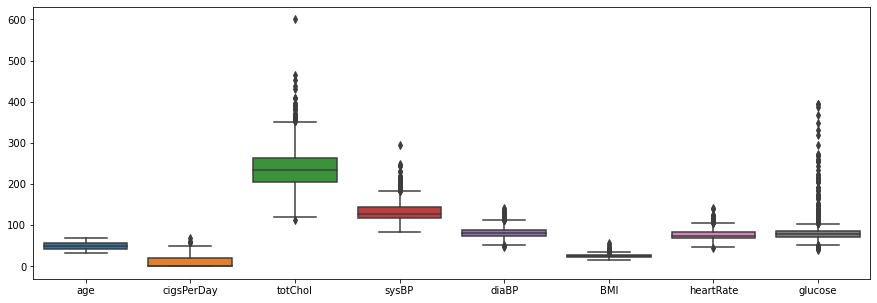

In [34]:
# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=risk_df[numeric_features])
plt.show()    

In [35]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(risk_df):
    for col in risk_df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = risk_df[col].quantile(0.25)
        q3 = risk_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        risk_df[col] = risk_df[col].clip(lower_bound, upper_bound)
    return risk_df

In [36]:
# using the function to treat outliers
risk_df = clip_outliers(risk_df)

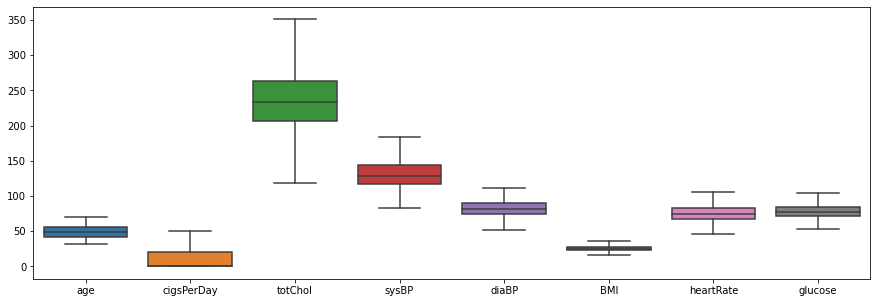

In [37]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=risk_df[numeric_features])
plt.show() 

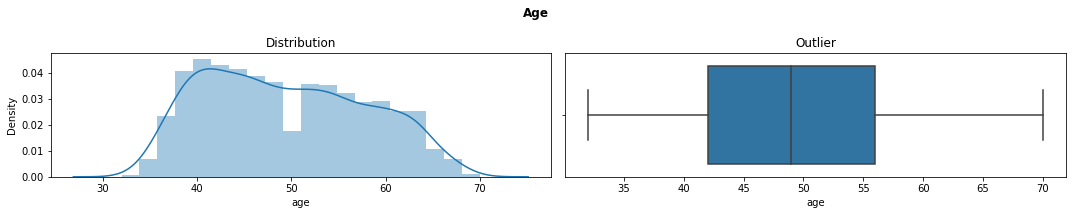

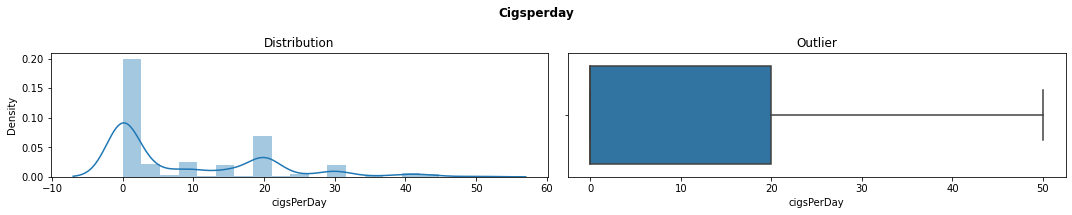

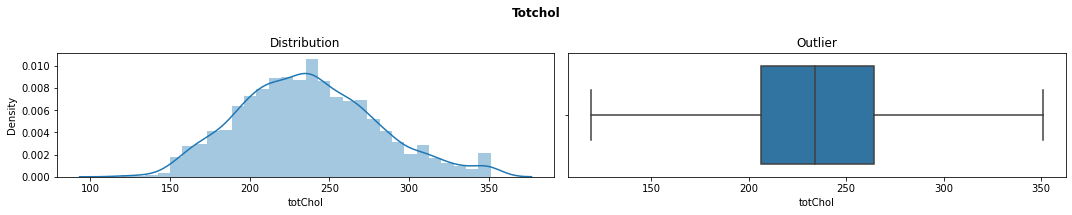

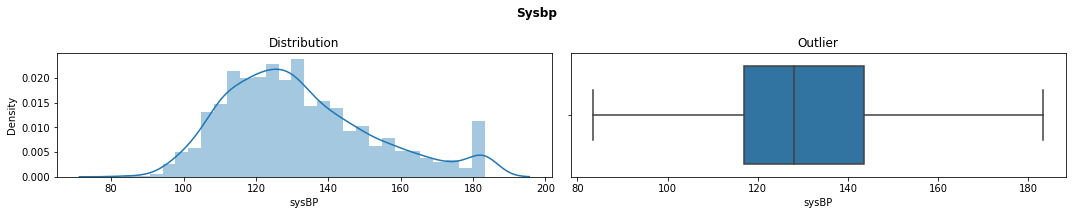

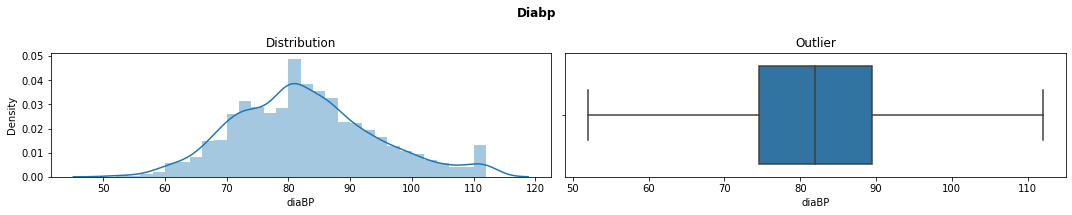

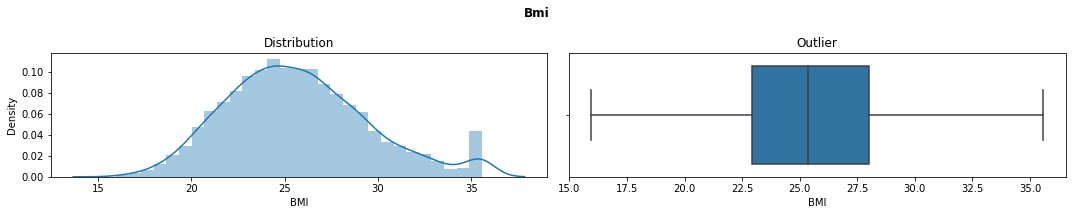

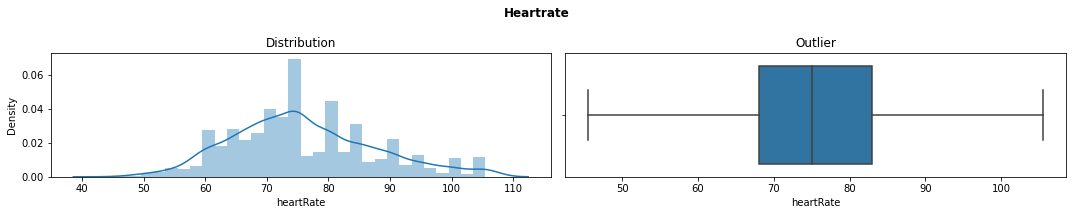

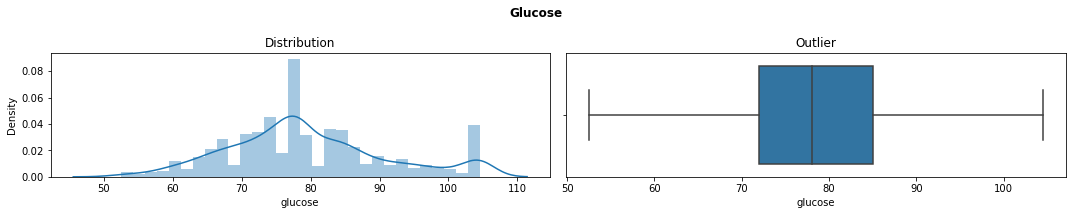

In [38]:
# checking for distribution after treating outliers.
for col in numeric_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3)) 
  sns.distplot(risk_df[col], ax=ax[0]).set(title="Distribution")
  sns.boxplot(risk_df[col], ax=ax[1]).set(title="Outlier")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

In [39]:
# Label Encoding

risk_df['sex'] = risk_df['sex'].map({'M':1, 'F':0})
risk_df['is_smoking'] = risk_df['is_smoking'].map({'YES':1, 'NO':0})

In [40]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",risk_df[i].nunique())

No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in TenYearCHD is 2


In [41]:
# dropping our target variable from categorical features list
categorical_features.pop(-1)

'TenYearCHD'

In [42]:
# check the datatypes of each column in the DataFrame
risk_df.dtypes

age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [43]:
# Cast values in the categorical columns as type str.
risk_df[categorical_features] = risk_df[categorical_features].astype(str)

# checking the result
risk_df.dtypes

age                  int64
education           object
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [44]:
# one-hot encode the 'education' feature
education_onehot = pd.get_dummies(risk_df['education'], prefix='education')

# drop the original education feature
risk_df.drop('education', axis=1, inplace=True)

# concatenate the one-hot encoded education feature with the rest of the data
risk_df = pd.concat([risk_df, education_onehot], axis=1)
risk_df.head(3)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
id,,,,,,,,,,,,,,,,,,,
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,0,1
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,0,0


<AxesSubplot:>

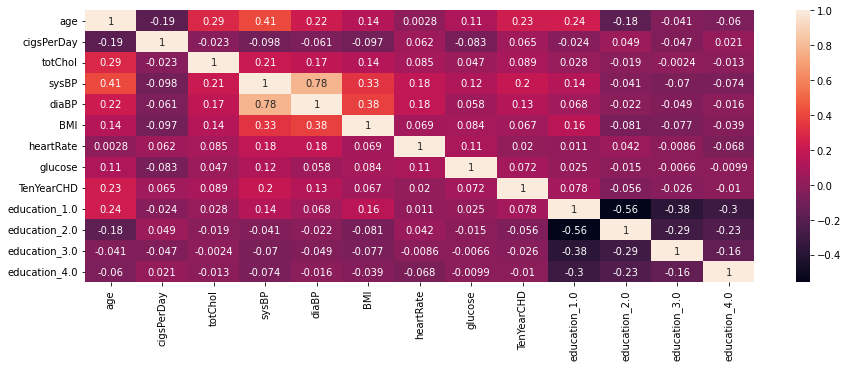

In [45]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(risk_df.corr(), annot=True)     

In [46]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
# checking the highly correlated features
correlation(risk_df, 0.7)          # setting threshold of 0.7

{'diaBP'}

In [48]:
# adding new column PulsePressure 
risk_df['pulse_pressure'] = risk_df['sysBP'] - risk_df['diaBP']

# dropping the sysBP and diaBP columns
risk_df.drop(columns=['sysBP', 'diaBP'], inplace=True)

In [49]:
# checking data, weather the provide information is correct or not
risk_df[(risk_df.is_smoking == 'YES') & (risk_df.cigsPerDay == 0)]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
id,,,,,,,,,,,,,,,,,,


In [50]:
# droping is_smoking column due to multi-collinearity

risk_df.drop('is_smoking', axis=1, inplace=True)

In [51]:
X = risk_df.drop('TenYearCHD', axis=1)
y= risk_df['TenYearCHD']

In [52]:
# importing libarary
from sklearn.ensemble import ExtraTreesClassifier

# model fitting 
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.148183
pulse_pressure     0.138354
BMI                0.129336
totChol            0.127892
glucose            0.121884
heartRate          0.120121
cigsPerDay         0.086082
prevalentHyp       0.024848
sex                0.019862
education_2.0      0.014709
education_1.0      0.014471
education_3.0      0.013599
education_4.0      0.012485
diabetes           0.011352
BPMeds             0.010444
prevalentStroke    0.006377
dtype: float64


In [53]:
# importing libarary
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# model fitting
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)

# ranking feature based on importance
feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

pulse_pressure     457.250519
age                249.931510
cigsPerDay         205.859597
totChol            199.719662
prevalentHyp        58.674438
diabetes            27.931583
glucose             27.889622
BPMeds              27.187058
sex                 12.252065
education_1.0       11.262185
BMI                  8.294096
prevalentStroke      7.219641
education_2.0        6.906798
heartRate            2.207399
education_3.0        1.827872
education_4.0        0.287447
dtype: float64

In [54]:
# importing libarary
from sklearn.feature_selection import mutual_info_classif

# model fitting
mutual_info = mutual_info_classif(X,y)

# ranking feature based on importance. 
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.024842
prevalentHyp       0.013400
BPMeds             0.012550
pulse_pressure     0.009606
cigsPerDay         0.009022
glucose            0.008918
BMI                0.005518
sex                0.005291
education_3.0      0.004609
education_1.0      0.004534
prevalentStroke    0.002186
diabetes           0.001657
education_2.0      0.000408
totChol            0.000000
heartRate          0.000000
education_4.0      0.000000
dtype: float64

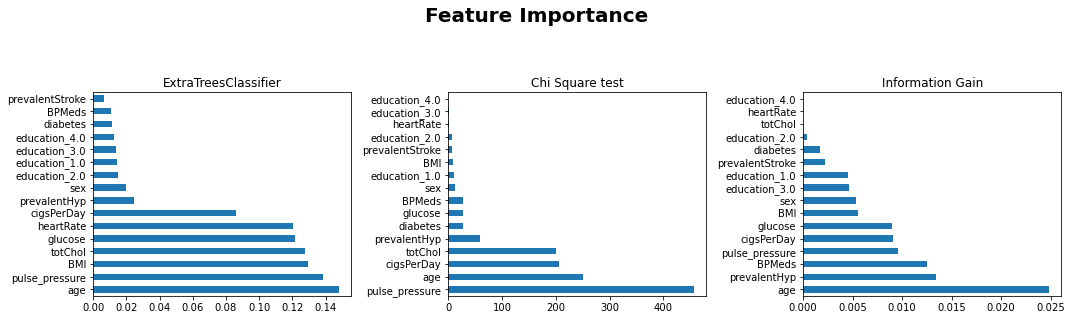

In [55]:
# plotting graph ---> Feature Importance
fig, axs = plt.subplots(1,3, figsize=(15,4))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2])

plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

<AxesSubplot:>

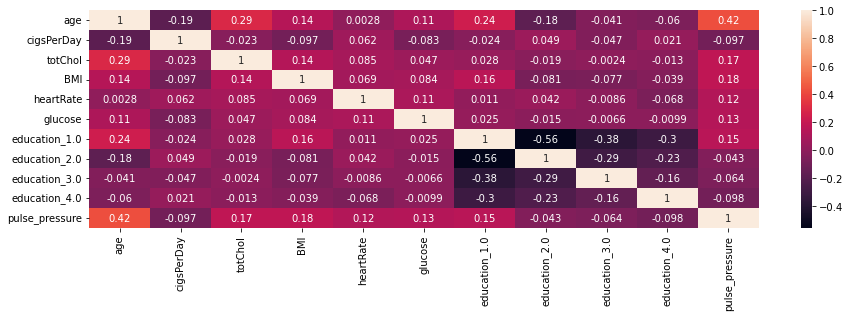

In [56]:
# plotting correlation heatmap to check multicollinearity.
plt.figure(figsize=(15,4))
sns.heatmap(risk_df.drop(columns='TenYearCHD').corr(),annot=True)

In [57]:
correlation(risk_df, 0.7)         # 0.7 is the thresold value for multicollinearity

set()

In [58]:
# copying the data to save the work done till now
model_df = risk_df.copy()
model_df.head(3)

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
id,,,,,,,,,,,,,,,,,
1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,0,0,0,1,70.0
2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,1,0,0,0,45.0
3,50,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,1,0,0,0,70.0


In [59]:
X = model_df.drop(columns='TenYearCHD')     # independent features
y = model_df['TenYearCHD']                  # dependent features

0    2714
1     475
Name: TenYearCHD, dtype: int64
 


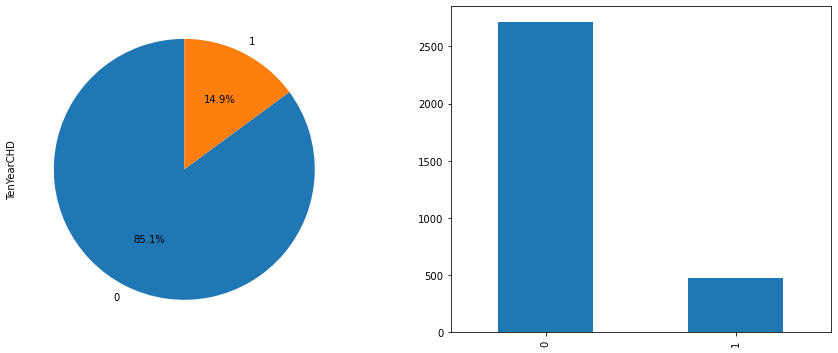

In [60]:
# Dependant Column Value Counts
print(model_df.TenYearCHD.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
model_df['TenYearCHD'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
model_df['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

In [61]:
## Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)
# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2714, 1: 475})
After Handling Imbalanced class Counter({0: 2714, 1: 2714})


In [62]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(4342, 16)
(1086, 16)


In [63]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# empty list for appending performance metric score 
model_result = []

def predict(ml_model, model_name):
  
  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  ''' 
  
  # model fitting
  model = ml_model.fit(X_train, y_train)
  
  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics ''' 
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')
  
  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  
  ''' plotting ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)


  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

# Logical Regression

train accuracy : 0.801
test accuracy : 0.808
train precision : 0.861
test precision : 0.883
train recall : 0.712
test recall : 0.731
train f1 : 0.779
test f1 : 0.8
train roc_auc : 0.883
test roc_auc : 0.892
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       518
           1       0.88      0.73      0.80       568

    accuracy                           0.81      1086
   macro avg       0.82      0.81      0.81      1086
weighted avg       0.82      0.81      0.81      1086

--------------------------------------------------------------------------------


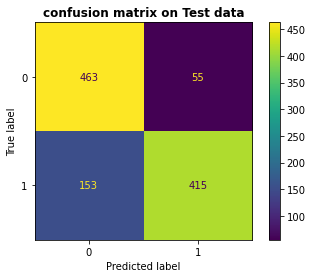

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     0     0     0     1     0     0     1     0     0
--------------------------------------------------------------------------------


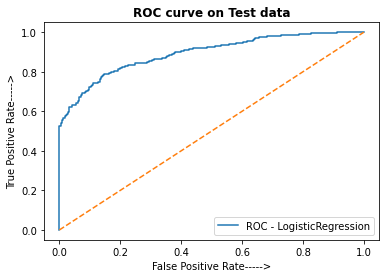

In [65]:
predict(LogisticRegression(), 'LogisticRegression')

# Decession Tree

train accuracy : 1.0
test accuracy : 0.841
train precision : 1.0
test precision : 0.845
train recall : 1.0
test recall : 0.852
train f1 : 1.0
test f1 : 0.848
train roc_auc : 1.0
test roc_auc : 0.84
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       518
           1       0.84      0.85      0.85       568

    accuracy                           0.84      1086
   macro avg       0.84      0.84      0.84      1086
weighted avg       0.84      0.84      0.84      1086

--------------------------------------------------------------------------------


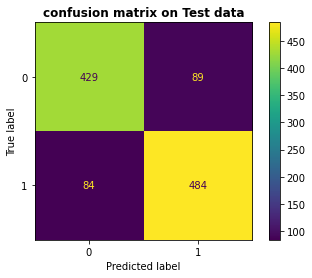

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


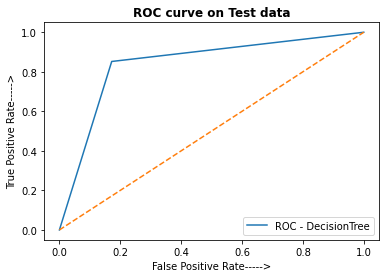

In [66]:
predict(DecisionTreeClassifier(), 'DecisionTree')

# AdaBoost

train accuracy : 0.865
test accuracy : 0.855
train precision : 0.92
test precision : 0.924
train recall : 0.796
test recall : 0.787
train f1 : 0.854
test f1 : 0.85
train roc_auc : 0.929
test roc_auc : 0.919
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       518
           1       0.92      0.79      0.85       568

    accuracy                           0.85      1086
   macro avg       0.86      0.86      0.85      1086
weighted avg       0.86      0.85      0.85      1086

--------------------------------------------------------------------------------


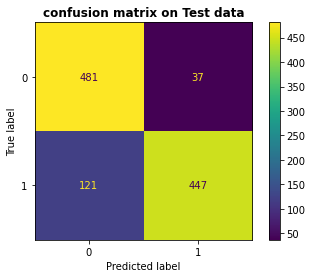

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


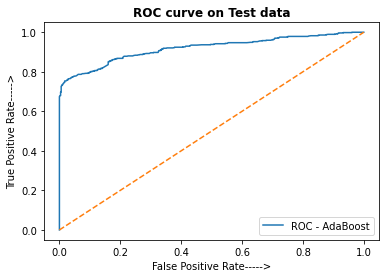

In [67]:
predict(AdaBoostClassifier(), 'AdaBoost')

# XGBOOST

In [71]:
xgb_params = {'n_estimators': [1000],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[19:02:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [72]:
optimal_model = xgb_gridsearch.best_estimator_
optimal_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

[19:04:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

train accuracy : 1.0
test accuracy : 0.903
train precision : 1.0
test precision : 0.941
train recall : 1.0
test recall : 0.87
train f1 : 1.0
test f1 : 0.904
train roc_auc : 1.0
test roc_auc : 0.951
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       518
           1       0.94      0.87      0.90       568

    accuracy                           0.90      1086
   macro avg       0.90      0.90      0.90      1086
weighted avg       0.91      0.90      0.90      1086

--------------------------------------------------------------------------------


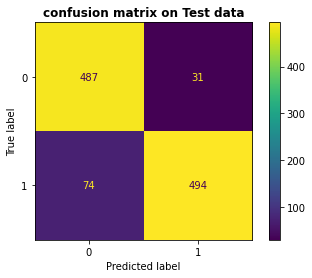

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


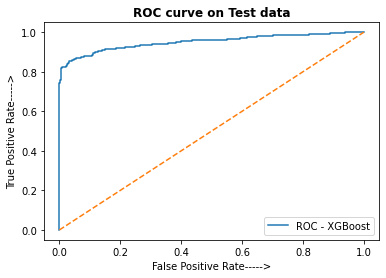

In [73]:
predict(optimal_model, 'XGBoost')

In [76]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.801,0.808,0.861,0.883,0.712,0.731,0.779,0.800,0.883,0.892
1,DecisionTree,1.000,0.841,1.000,0.845,1.000,0.852,1.000,0.848,1.000,0.840
2,AdaBoost,0.865,0.855,0.920,0.924,0.796,0.787,0.854,0.850,0.929,0.919
3,XGBoost,1.000,0.903,1.000,0.941,1.000,0.870,1.000,0.904,1.000,0.951
4,XGBoost,1.000,0.903,1.000,0.941,1.000,0.870,1.000,0.904,1.000,0.951


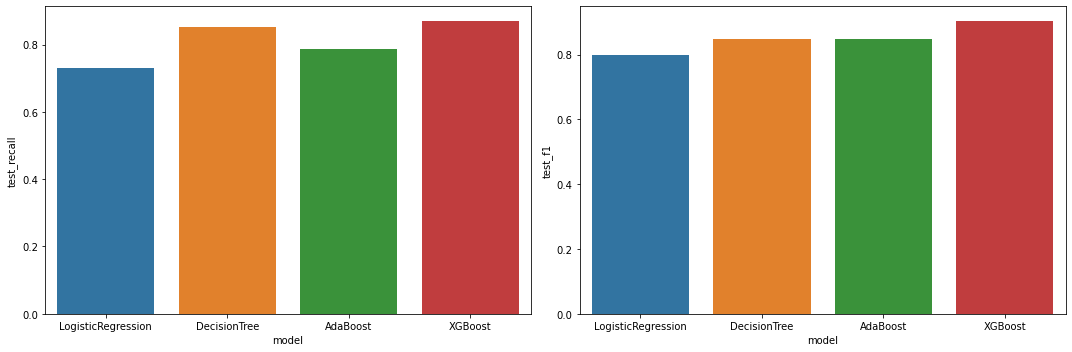

In [77]:
# plotting graph to compaire model performance of all the models
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0])   # Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])       # Model vs F1 score 
plt.tight_layout()